<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/K_means_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento

## problemas 1-7
- problema 1: Determinar el valor inicial del punto central -> `def _init_centers(self, X)`
- problema 2: Crear una función paraobtener SSE -> `def _compute_sse(self, X, labels, centers)`
- problema 3: Asignación al cluster -> `def _assing_clusters(self, X, centers)`
- problema 4: Mover el punto central -> `def _update_centers(self, X, labels)`
- problema 5 y 6: Repetir y calcular con diferentes valores iniciales-> `def fit(self, X)`
- Problema 7: estimación -> `def predict(self, X)`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Artificial datasets for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    random_state=0
)

# Scratch k-means Class
class ScratchKMeans():

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as atributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose


    #Problem 1: Determine the initial value of the cebnter point
    def _init_centers(self, X):
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]


    #Problem 2: Creation of a function to obtain SSE
    def _compute_sse(self, X, labels, centers):
        sse = 0
        for k in range(self.n_clusters):
            sse += np.sum((X[labels == k] - centers[k])**2)

        return sse


    # Problem 3: Allocation to cluster
    def _assing_clusters(self, X, centers):
        labels = np.array([
            np.argmin([np.linalg.norm(x - c) for c in centers])
            for x in X
        ])
        return labels


    # Problem 4: Movement of center point
    def _update_centers(self, X, labels):
        centers = np.array([
            X[labels == k].mean(axis=0) if len(X[labels == k]) > 0 else np.zeros(X.shape[1])
            for k in range(self.n_clusters)
        ])
        return centers


    # Problem 5 and 6: Repeat and calculate with different initial values
    def fit(self, X):
        best_sse = np.inf
        best_centers = None
        best_labels = None

        for init_num in range(self.n_init):
            centers = self._init_centers(X)

            for i in range(self.max_iter):
                labels = self._assing_clusters(X, centers)
                new_centers = self._update_centers(X, labels)
                shift = np.sum(np.linalg.norm(centers - new_centers, axis=1))

                if self.verbose:
                    print(f"Init {init_num}, Iter {i+1}, SSE: {self._compute_sse(X, labels, centers)}, Shift: {shift:.4f}")

                if shift <= self.tol:
                    break

                centers = new_centers

            sse = self._compute_sse(X, labels, centers)
            if sse < best_sse:
                best_sse = sse
                best_labels = labels
                best_centers = centers

        self.centers = best_centers
        self.labels = best_labels
        self.sse_ = best_sse


    # Problem 7: Estimate
    def predict(self, X):
        return self._assing_clusters(X, self.centers)

Init 0, Iter 1, SSE: 444.1393057017616, Shift: 4.4660
Init 0, Iter 2, SSE: 85.83422279947038, Shift: 1.6042
Init 0, Iter 3, SSE: 48.63378320706403, Shift: 0.0000
Init 1, Iter 1, SSE: 618.1306105105641, Shift: 3.4813
Init 1, Iter 2, SSE: 248.13766100593412, Shift: 1.8824
Init 1, Iter 3, SSE: 176.99225915694933, Shift: 2.9607
Init 1, Iter 4, SSE: 55.923139943521676, Shift: 0.8549
Init 1, Iter 5, SSE: 48.63378320706403, Shift: 0.0000
Init 2, Iter 1, SSE: 621.7538816193813, Shift: 5.5646
Init 2, Iter 2, SSE: 123.25802208059191, Shift: 2.1475
Init 2, Iter 3, SSE: 50.17648827322996, Shift: 0.3295
Init 2, Iter 4, SSE: 48.63378320706403, Shift: 0.0000
Init 3, Iter 1, SSE: 386.29481874664685, Shift: 3.6386
Init 3, Iter 2, SSE: 135.0232102335521, Shift: 0.0000
Init 4, Iter 1, SSE: 755.6430270913519, Shift: 4.7735
Init 4, Iter 2, SSE: 376.1585447162814, Shift: 1.9810
Init 4, Iter 3, SSE: 307.25621109003566, Shift: 1.3203
Init 4, Iter 4, SSE: 253.73995037614378, Shift: 2.1642
Init 4, Iter 5, SSE: 

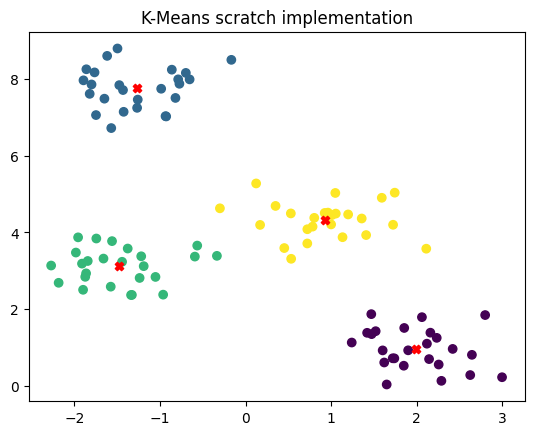

In [2]:
# Running Scratch  KMeans
kmeans = ScratchKMeans(n_clusters=4, n_init=5, max_iter=1000, tol=1e-4, verbose=True)
kmeans.fit(X)

print(f'Final SSE: {kmeans.sse_}')

# Plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', marker='X')
plt.title('K-Means scratch implementation')
plt.show()

## problema 8: implementación del método elbow

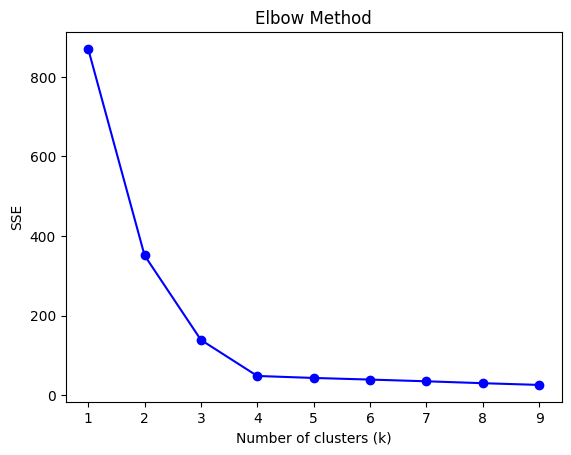

In [3]:
sse_list = []
k_range = range(1, 10)

for k in k_range:
    km = ScratchKMeans(n_clusters=k, n_init=5, max_iter=1000, tol=1e-4)
    km.fit(X)
    sse_list.append(km.sse_)

plt.plot(k_range, sse_list, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

## problema 9: diagrama de Silueta (silhouette)

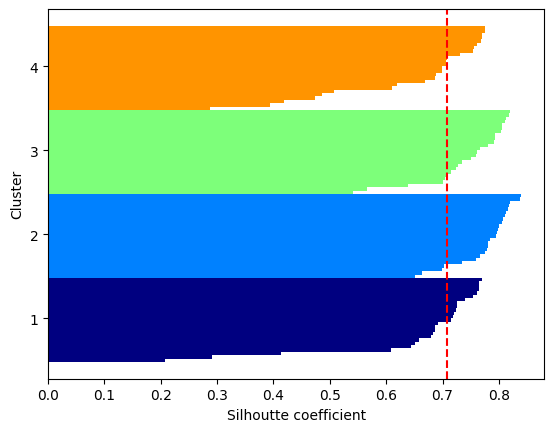

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
y_km = km.fit_predict(X)
silhouette_vals = silhouette_samples(X, y_km)
silhouette_avg = silhouette_score(X, y_km)
cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)

from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhoutte_vals = silhouette_vals[y_km == c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhoutte_vals,
        height=1.0,
        edgecolor='none',
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhoutte_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhoutte coefficient')
plt.show()

## Problema 10: selección de número de clusters k

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

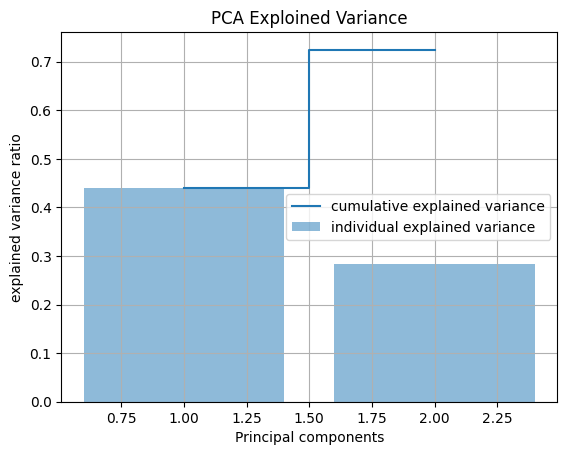

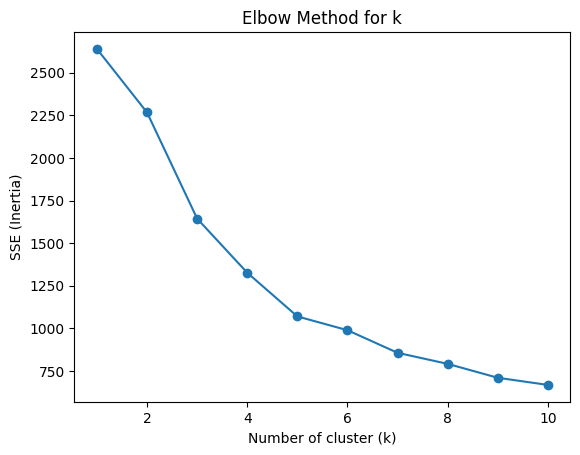

Averange silhouette score: 0.4582633767207058


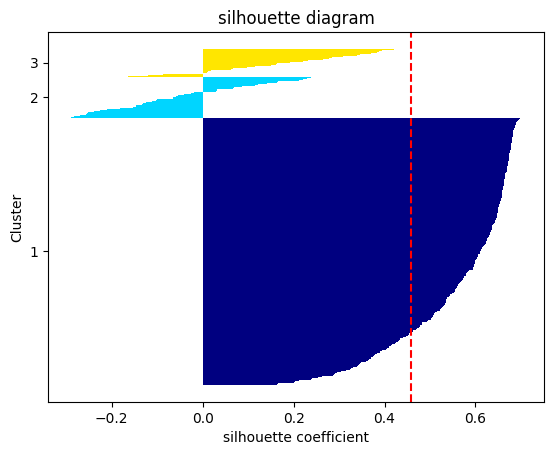

In [9]:
# Cluster analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE

# Loading and inspect data

#from google.colab import files
#uploaded = files.upload()
data = pd.read_csv("Wholesale customers data.csv")
print(data.head())
print(data.info())

# Drop Region & Channel for clustering (monetary only)
X = data.drop(['Region', 'Channel'], axis=1)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using PCA to visualize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#plotting explained variance
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print('\nCumulative explained variance: ', cum_var_exp)

plt.bar(range(1, 3), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 3), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA Exploined Variance')
plt.legend(loc='best')
plt.grid()
plt.show()

# Usingf Elbow Method for k
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for k')
plt.show()

# Silhoutte Analisys for k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Averange silhouette score: {silhouette_avg}')

# silhouette diagram
sil_vals = silhouette_samples(X_scaled, labels)
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i in range(k):
    c_silhoutte_vals = sil_vals[labels == i]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i) / k)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhoutte_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhoutte_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, [str(i+1) for i in range(k)])
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.title('silhouette diagram')
plt.show()

### Explicacion:
En un intento por llegar al valor mas apropiado de k, se empleó el metodo del codo y silhouette analysis.
La gráfica de codo reveló una curva visible en k = 3, lo que significa que hay retornos decrecientes para bajar el SSE después de k = 3. También el valor medio de silhouette en k = 3 fue aproximadamente de 0.4582, lo que indica que los grupos formados están bastante separados.
la elección de k = 3 grupos parece factible, ya que un mayorista puede segmentar a los clientes en grupos identificables (por ejemplo , pequeños minoristas, grandes minoristas y restaurantes), a los que son convenientes ser interpretados y respondidos. Por lo tanto, concluimos que el número de grupos mas razonables y mejor equilibrado fue de 3.

## Problema 11: comparación con grupos conocidos

In [10]:
# Attaching cluster labels to original data
data['Cluster'] = labels

# Comparing clusters with region and channel
print('\nComparison with  Region:')
print(pd.crosstab(data['Region'], data['Cluster']))

print('\nComparison with channel:')
print(pd.crosstab(data['Channel'], data['Cluster']))


Comparison with  Region:
Cluster    0   1   2
Region              
1         63   7   7
2         37   2   8
3        250  44  22

Comparison with channel:
Cluster    0   1   2
Channel             
1        251  47   0
2         99   6  37


### Explicación:
Habiendo realizado la agrupación K-means (k=3), se comparó los grupos emergentes con las etiquetas conocidas "Region" y "Channel" y no se vió en la agrupación, se observó:
- El cluster 0 tiene los clientes channel 1 y channel 2 (principalmente channel 1).
- El cluster 1 está dominado por channel 1.
- El cluster 2 comprende solo los clientes de channel 2.

La comparación con la región indicó que había una distribución más amplia del cluster 0 en todas las regiones, además, que el cluster 1 y el cluster 2 se limitan principalmente a la region 3.
Estás observaciones indican que el cluster K-means puede no reflejar las etiquetas conocidas "Region" y "Channel". Esto implica que el patron del centroide del modelo no trae una imagen clara de los patrones de "Region" y "Channel", pero saca una imagen clara de la segmentación del cliente.

## Problema 12: Información útil para mayoristas

In [11]:
# View mean spending per cluster
summary = data.groupby('Cluster').mean()
print('\nCluster Summary Stats: ')
print(summary)


Cluster Summary Stats: 
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


### Explicacion:
El análisis de los medios de los patrones de gastos en cada cluster (en los datos originales, no escalados) produce tres perfiles diferentes de clientes:
- El grupo 1 tiene un gasto  increiblemente alto en articulos frescos y congelados que indican que lo más probable es que sean restaurantes o compañias de servicios de alimentos que dependen de materias primas perecederas.
- El grupo 2 tiene un buen gasto en leche, comestibles y detergentes, que muestra que lo mas probable es que estos clientes sean las grandes tiendas minoristas o supermercados.
- El grupo 0 gasta de manera moderada y bastante uniforme en cada categoría, probablemente pequeñas tiendas locales o empresas de uso mixto.

Esta segmentación particular puede ser muy útil para el mayorista al permitirles:
- Personalizar las promociones y ofertas (por ejemplo, promoción de artículos frescos al grupo 1).
- La planificación y la logística deben optimizarse de acuerdo con el comportamiento de compra.
- Indentifica alguna posibilidad de isitar a la venta, o incluso a los productos, que puedan adaptarse a un grupo en particular.

## Problema 13: Invesigación sobre otros metodos

### DBSCAN
Ventajas:
- Puede incurrir en forms no esféricas (no solo en los grupos com K-means).
- Identifica los valores atípicos automaticamente (marcodos con ruidos).
- No hay necesidad de definir el número de clusters (k).

Desventajas:
- Hay un redimiento degradado en los datos de alta dimensión.
- Tiene que estar definido (eps(radio) y min_samples(minimo de pupntos por cluster)).
- Los cluster son de diferentes densidad, es dificil de separar de manera adecuada.

## t-SNE
Ventajas:
- Efectivo al visualizar datos de alta dimension como 2D o 3D.
- Mantien bien las estructuras locales, los mismos puntos tienden a permanecer juntos.

Desventajas:
- Muy lento computacionalmente por grandes conjuntos de datos.
- No sirve com reducción de dimensionalidad general a los clusters, utilizada principalmente como visualización.
- Muy sensible al hiperparametro (perplexity).

## LLE
Ventajes:
- Mantiene las relaciones locales del vencindario en dimensiones reducidas.
- Reducción de dimensionalidad no lineal, son adecuados para el aprendizaje múltiple.

Desventajas:
- Sensible al ruido.
- Podría no funcionar cuando la suposición del colector es débil.
- No proporciona asignación específica de nuevos puntos de datos (no paramétricos).

## Problema 14: Utilizar t-SNE y DBSCAN

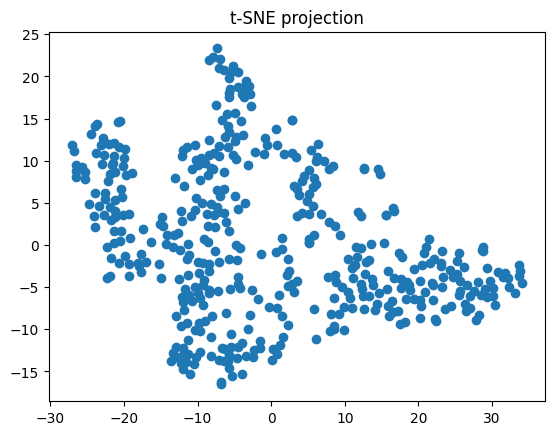

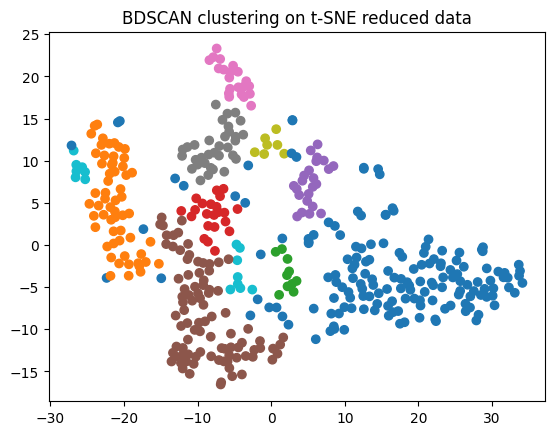

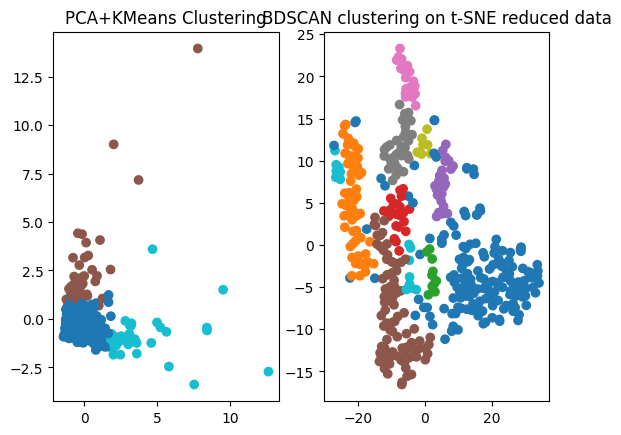

In [12]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Applying t-SNE for 2D embedding
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE projection')
plt.show()

# Using  DBSCAN on t-SNE redeced data
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(X_tsne)

#plotting DBSCAN clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='tab10')
plt.title('BDSCAN clustering on t-SNE reduced data')
plt.show()

# comparing with original PCA+KMeans
plt.Figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
plt.title('PCA+KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='tab10')
plt.title('BDSCAN clustering on t-SNE reduced data')

plt.show()